통계 파일로부터 저장된 csv 파일 불러다가 플롯 그리는 역할.

In [43]:
# 사전 변수
csv_dir = '/home/hschoi/leehyunwon/ECG-SNN/new_server/ver6/statistics/tensorboard_to_pandas/channel.csv'
savefile_name = 'channel.pdf'

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



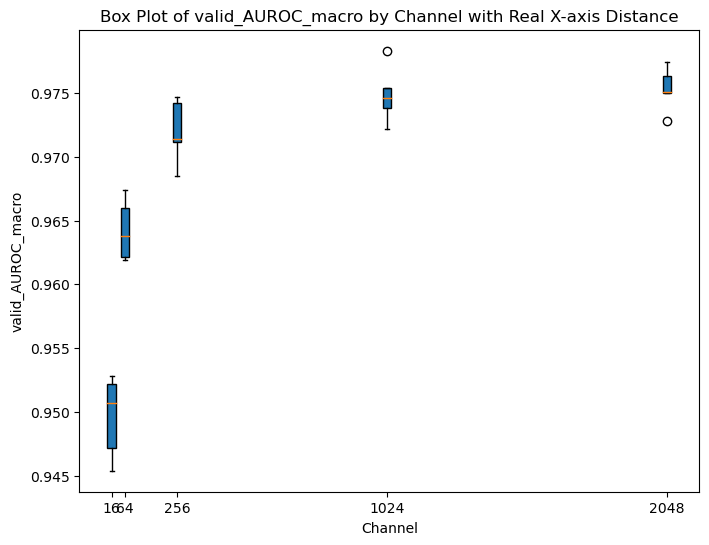

In [ ]:
# CSV 파일 불러오기
data = pd.read_csv(csv_dir)

# 1. 폴더명에서 'channel_xx' 추출하여 x축 값 추가
def extract_channel(source_dir):
    if "channel_" in source_dir:
        # 'channel_' 뒤의 값을 추출
        channel_value = int(source_dir.split("channel_")[1].split("_")[0])
        return channel_value
    return 1024

data['channel'] = data['source_dir'].apply(extract_channel)

# 2. 폴더명에서 시간 기록(yyyy-mm-dd-hh-mm-ss)을 추출하여 그룹화 키 추가
def extract_time_key(source_dir):
    return "-".join(source_dir.split("_")[:-2])

data['time_key'] = data['source_dir'].apply(extract_time_key)

# box plot 그리기
metrics = ["valid_AUROC_macro"]

# # 그룹화하여 박스플롯 생성
# for metric in metrics:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(data=data, x="channel", y=metric, hue="time_key")
#     plt.title(f"Box Plot of {metric} by Channel and Time Key")
#     plt.xlabel("Channel")
#     plt.ylabel(metric)
#     plt.xticks(rotation=45)
#     plt.legend(title="Time Key", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
    
#     # pdf로 저장
#     savefile_name = f"{metric}_boxplot.pdf"
#     plt.savefig(savefile_name, format="pdf", bbox_inches="tight")
#     plt.show()

# plt.close()


# 그룹화하여 박스플롯 생성
for metric in metrics:
    plt.figure(figsize=(10, 6))

    # 고유 채널 값을 정렬하여 실제 x축 위치를 설정
    unique_channels = sorted(data['channel'].unique())
    channel_positions = {channel: idx for idx, channel in enumerate(unique_channels)}

    # 각 채널에 대해 데이터를 수집하여 x축 위치 설정
    positions = [channel_positions[channel] for channel in data['channel']]
    values = data[metric]

    # x축 위치를 실제 채널 값으로 사용하여 박스플롯 그리기
    unique_positions = list(channel_positions.values())
    grouped_data = [data[data['channel'] == channel][metric].values for channel in unique_channels]

    # 박스플롯 생성
    plt.boxplot(grouped_data, positions=unique_channels, widths=30, patch_artist=True)

    # x축을 실제 채널 값으로 표시
    plt.xticks(ticks=unique_channels, labels=unique_channels)
    plt.xlabel("Channel")
    plt.ylabel(metric)
    plt.title(f"Box Plot of {metric} by Channel with Real X-axis Distance")

    # PDF 저장
    savefile_name = f"{metric}_boxplot_real_distance.pdf"
    plt.savefig(savefile_name, format="pdf", bbox_inches="tight")
    plt.show()

plt.close()